In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, MiniBatchKMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd



In [2]:
# Reload datasets without header
emg_df = pd.read_csv('data/EMG1.csv', header=None, names=['EMG'])
hpc_df = pd.read_csv('data/HPC1.csv', header=None, names=['HPC'])
pfc_df = pd.read_csv('data/PFC1.csv', header=None, names=['PFC'])

# Combine into a single DataFrame
data = pd.concat([emg_df, hpc_df, pfc_df], axis=1)

In [3]:
# Scale the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

Cluster Counts:
Cluster
2    368698
6    224487
0    217258
3    212431
5    198575
4     66335
1     54755
Name: count, dtype: int64


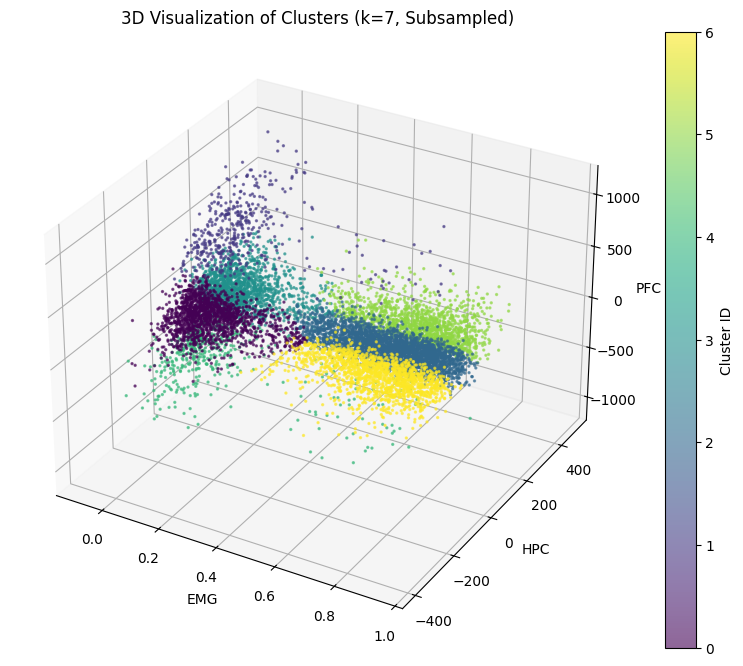

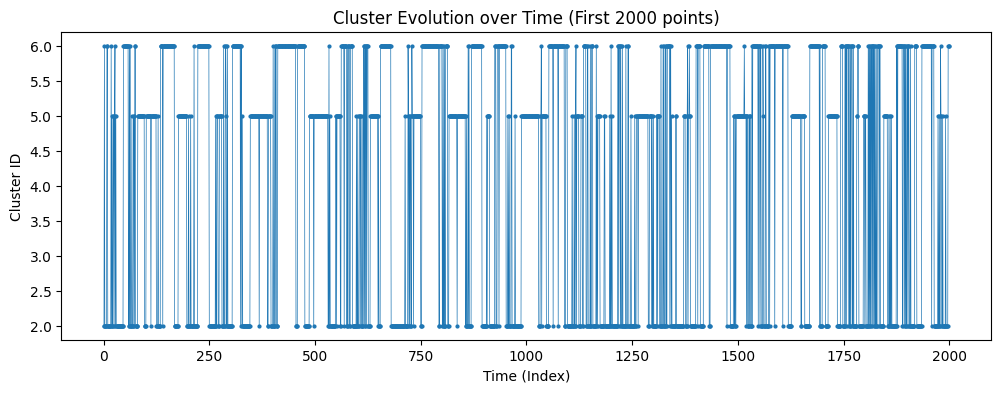

In [4]:
# Run KMeans with k=7 on the full dataset
kmeans_final = KMeans(n_clusters=7, random_state=42)
clusters = kmeans_final.fit_predict(data_scaled)

# Add clusters to the original dataframe
data['Cluster'] = clusters

# Save the clustered data (sample)
data_sample = data.sample(n=10000, random_state=42)

# 3D Plot of the clusters (using the sample)
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(data_sample['EMG'], 
                     data_sample['HPC'], 
                     data_sample['PFC'], 
                     c=data_sample['Cluster'], 
                     cmap='viridis', 
                     s=2, 
                     alpha=0.6)

ax.set_xlabel('EMG')
ax.set_ylabel('HPC')
ax.set_zlabel('PFC')
ax.set_title('3D Visualization of Clusters (k=7, Subsampled)')
plt.colorbar(scatter, label='Cluster ID')
plt.savefig('cluster_3d_plot.png')

# Temporal evolution plot (Cluster ID over time)
# Plotting a segment of 2000 points to make it readable
plt.figure(figsize=(12, 4))
plt.plot(data['Cluster'].iloc[:2000], marker='o', linestyle='-', markersize=2, linewidth=0.5)
plt.title('Cluster Evolution over Time (First 2000 points)')
plt.xlabel('Time (Index)')
plt.ylabel('Cluster ID')
plt.savefig('cluster_time_evolution.png')

# Save the full result to a CSV (if requested, but usually files are too big to just cat out)
# I'll save a summary or the first few rows to show
output_filename = 'clustered_data.csv'
data.to_csv(output_filename, index=False)

print("Cluster Counts:")
print(data['Cluster'].value_counts())